<img src="./Img/sci.png">

### <center> Финансовый университет
## <center>  Инструментальная поддержка анализа<br> финансово-экономических данных
## <center> Тема 3. Введение в машинное обучение

Семинар<br>
13 марта 2021 года<br>
Поток: ПМ18-1, ПМ18-2, ПМ18-3, ПМ18-4

Преподаватель: Смирнов Михаил Викторович, mvsmirnov@fa.ru

# Классификация ирисов
https://archive.ics.uci.edu/ml/datasets/iris

### Импорт библиотек

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Изучение данных

In [2]:
load_iris?

In [3]:
iris=load_iris()

Объект _iris_ - это словарь.

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Значением ключа _data_ является _numpy массив_ с данными о цветках ириса: 150 цветков, для каждого измерены длина и ширина чашелистика и лепестка. Значением ключа _target_ также является _numpy массив,_ содержащий метки класса. Создадим две переменных: _X_ для данных и _y_ для меток.

In [5]:
X=iris['data']
y=iris['target']

Изучим размерность X и y.

In [6]:
print(X.shape, y.shape)

(150, 4) (150,)


Для наглядности поместим данные в таблицу _DataFrame_ и построим графики для каждой пары признаков.

In [7]:
df=pd.DataFrame(data=X, index=y, columns=iris['feature_names'])
df.reset_index(inplace=True) # метки индекса станут столбцом "index"
df.rename(columns={"index":"class_id"}, inplace=True) # переименуем "index" в "class_id"
df.sample(5)

,class_id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,1,6.1,3.0,4.6,1.4
73,1,6.1,2.8,4.7,1.2
134,2,6.1,2.6,5.6,1.4
112,2,6.8,3.0,5.5,2.1
31,0,5.4,3.4,1.5,0.4


Все ирисы разделены на три класса. В каждом классе 50 цветков.

In [8]:
df['class_id'].value_counts()

2    50
1    50
0    50
Name: class_id, dtype: int64

Построим графики

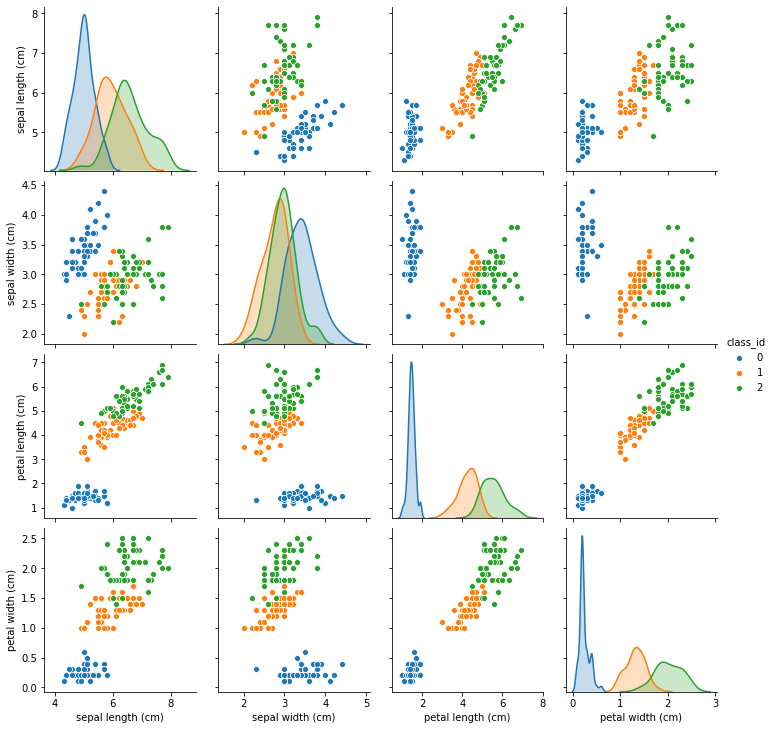

In [9]:
sns.pairplot(df, hue='class_id')

### Разделение данных

Перемешаем и разделим данные на тестовую и обучающую выборки

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [16]:
print(len(y_train[y_train==0]),len(y_train[y_train==1]),len(y_train[y_train==2]))
print(len(y_test[y_test==0]),len(y_test[y_test==1]),len(y_test[y_test==2]))

38 41 41
12 9 9


### Обучение и предсказание

Создадим классификатор посредством создания экземпляра класса _DecisionTreeClassifier._

In [17]:
clf=DecisionTreeClassifier()

In [18]:
# DecisionTreeClassifier?

Обучаем классификатор с использованием обучающей выборки.

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Предсказываем значение класса цветка с использованием тестовой выборки.

In [20]:
y_test_prediction=clf.predict(X_test)

Оценим точность предсказания класса тестовой выборки.

In [21]:
accuracy_score(y_test,y_test_prediction)

0.9666666666666667

Теперь предскажем класс и оценим точность предсказания алгоритма на обучающей выборке.

In [22]:
y_train_prediction=clf.predict(X_train)
accuracy_score(y_train,y_train_prediction)

1.0

### Улучшение точности предсказания

Важным параметром является глубина обучения. Будем последовательно, в цикле, изменять глубину обучения и переобучать алгоритм. Значение глубины увеличиваем от 1 до _depth._

In [23]:
def Train_and_Predict(depth, X_edu, y_edu, X, y):
    
    accuracy_scores=[] # Результаты обучения
    
    for depth in range(1,depth+1):
        clf=DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_edu, y_edu)
        
        y_prediction=clf.predict(X)
        prediction_accuracy=accuracy_score(y, y_prediction)
        
        accuracy_scores.append(round(prediction_accuracy,4))
    
    return accuracy_scores

In [24]:
depth=20
X_train_accuracy = Train_and_Predict(depth, X_train, y_train, X_train, y_train)
print(X_train_accuracy)

[0.6583, 0.9667, 0.975, 0.9917, 0.9917, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [25]:
X_test_accuracy = Train_and_Predict(depth, X_train, y_train, X_test, y_test)
print(X_test_accuracy)

[0.7, 0.9, 0.9333, 0.9333, 0.9333, 0.9667, 0.9667, 0.9667, 0.9667, 0.9333, 0.9333, 0.9333, 0.9667, 0.9333, 0.9333, 0.9333, 0.9333, 0.9333, 0.9333, 0.9333]


Представим результаты обучения с переменным значением глубины в виде таблицы.

In [26]:
result=pd.DataFrame([X_train_accuracy,X_test_accuracy],
                    index=['Train','Test'],
                    columns=[x for x in range(1,depth+1)])
result

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.6583,0.9667,0.9750,0.9917,0.9917,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Test,0.7000,0.9000,0.9333,0.9333,0.9333,0.9667,0.9667,0.9667,0.9667,0.9333,0.9333,0.9333,0.9667,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333


(0.6, 1.06)

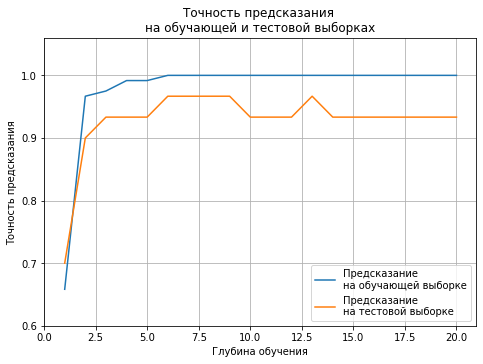

In [28]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.plot(result.columns, result.loc['Train'], label='Предсказание \nна обучающей выборке')
axes.plot(result.columns, result.loc['Test'], label='Предсказание \nна тестовой выборке')
axes.legend(loc=4)
axes.grid()
axes.set_xlabel('Глубина обучения')
axes.set_ylabel('Точность предсказания')
axes.set_title('Точность предсказания \nна обучающей и тестовой выборках')
axes.set_xlim(0)
axes.set_ylim(bottom=0.6,top=1.06)

### Важность признаков
Не все признаки одинаково важны.

In [30]:
clf.feature_importances_

array([0.        , 0.02918491, 0.91816023, 0.05265486])

In [31]:
dfi=pd.DataFrame([clf.feature_importances_],columns=iris['feature_names'],
                 index=['Importance'])
dfi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Importance,0.0,0.029185,0.91816,0.052655


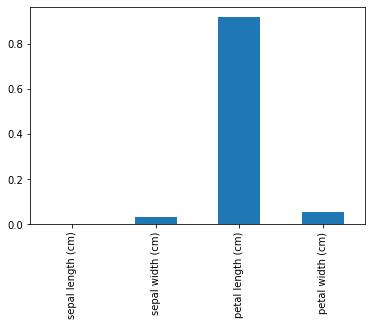

In [32]:
dfi.loc['Importance'].plot(kind='bar')

### Отрисовка дерева

Изображение дерева для понимания процесса классификации

In [33]:
from sklearn.tree import plot_tree

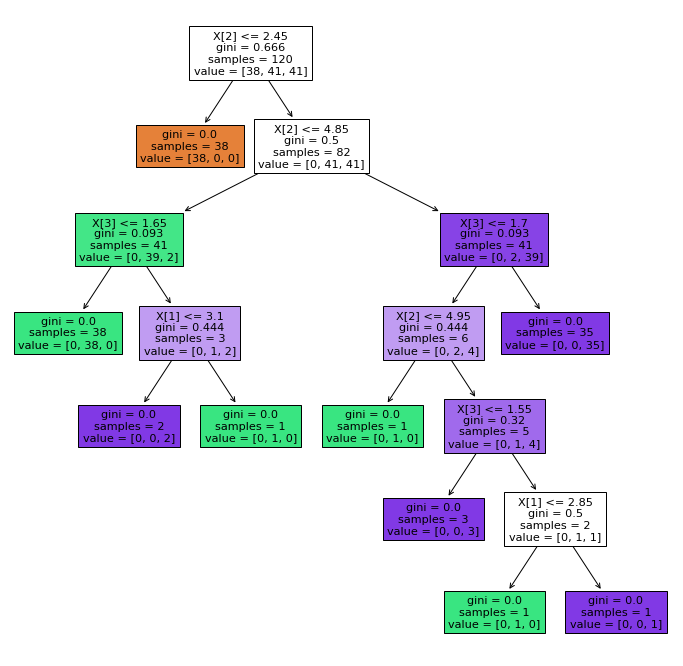

In [36]:
plt.figure(figsize=(12, 12))
plot_tree(clf, filled=True);

### Обучение по двум признакам

Мы увидели, что не все признаки одинаково полезны для обучения. Проведем обучение (с переменым значением глубины) заново по двум признакам, по которым хуже всего разделяются классы - _sepal length (cm)_ и _sepal width (cm)._

In [37]:
X_train_2f_accuracy=Train_and_Predict(depth, X_train[:,:2],y_train,X_train[:,:2],y_train)
X_test_2f_accuracy=Train_and_Predict(depth, X_train[:,:2],y_train,X_test[:,:2],y_test)

In [38]:
result_2f=pd.DataFrame([X_train_2f_accuracy,X_test_2f_accuracy],
                       index=['Train','Test'], 
                       columns=[x for x in range(1,depth+1)])
result_2f

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.6083,0.7667,0.8083,0.8333,0.8333,0.8667,0.8750,0.8917,0.9000,0.9167,0.9250,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333,0.9333
Test,0.7000,0.8000,0.8000,0.7667,0.7667,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333,0.7333


(0.6, 1)

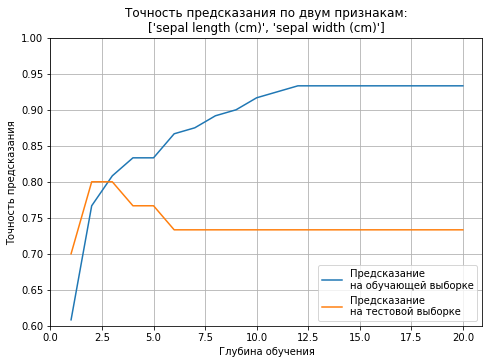

In [39]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.plot(result_2f.columns, result_2f.loc['Train'], label='Предсказание \nна обучающей выборке')
axes.plot(result_2f.columns, result_2f.loc['Test'], label='Предсказание \nна тестовой выборке')
axes.legend(loc=4)
axes.grid()
axes.set_xlabel('Глубина обучения')
axes.set_ylabel('Точность предсказания')
axes.set_title('Точность предсказания по двум признакам:\n'+str(iris['feature_names'][:2]))
axes.set_xlim(0)
axes.set_ylim(bottom=0.6,top=1)

**Вывод.** Результат обучения как по 4-м, так и по 2-м признакам показал, что начиная с некоторого порогового значения (3 для обучения на 2-х признаках), возникает переобучение, и дальнейшее увеличение глубины не приводит к улучшению предсказания на тестовой выборке.

### Признаки качества алгоритма

1. Недообучение.<br>
    Качество модели одинаково плохое на обучающей выборке и тестовой.


2. Оптимальное обучение.<br>
    Качество модели примерно одинаковое на обучающей выборке и тестовой.


3. Переобучение.<br>
     Качество модели хорошее на обучающей выборке и много хуже на тестовой.
     

### Кросс-валидация
В отдельных случаях можно получить 100% качество алгоритма.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

1.0

Но так ли это на самом деле? Разбиваем модель на несколько равных частей. Одна часть выделяется для тестирования, на остальных данных проходит обучение. По результатам тестирования рассчитывают среднюю оценку качества обучения.

<img src="./Img/05.03-5-fold-CV.png">
Источник: <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html">Python DataScience Handbook</a>


In [41]:
from sklearn.model_selection import cross_val_score

In [49]:
clf=DecisionTreeClassifier()
cv_result=cross_val_score(clf, X, y, scoring='accuracy', cv=5)
cv_result

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [50]:
np.mean(cv_result)

0.9600000000000002

### Подбор параметров модели с помощью сетки параметров

In [55]:
from sklearn.model_selection import GridSearchCV

Создадим словарь, ключами которого являются параметры дерева. Для получения списка параметров команада `DecisionTreeCalssifier?`

In [56]:
DecisionTreeClassifier?

In [75]:
params={
    'max_depth':list(range(1,21)),
    'criterion':['gini','entropy'],
    'min_samples_split':list(range(2,5)),
    'min_samples_leaf':list(range(1,3))
}

In [85]:
clf=DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
model.fit(X, y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

#### После обучения у модели доступны различные атрибуты, самые интересные:
    * .best_params_ - то что мы искали
    * .best_score_ - лучшее качество
    * .cv_results_ - полная информация по результатам кроссвалидации.
    * .best_estimator_ - лучшая модель, можно использовать как готовый классификатор

In [88]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}